# data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/exp_data/gamedata.pickle',"rb") as dt:
    data = pickle.load(dt)

In [3]:
data

{'102844212430075086':           Time                 Timestamp  blue_gold  blue_towers  blue_barons  \
 0     11-13-18  2019-10-02T11:13:18.688Z       2500            0            0   
 1     11-13-19  2019-10-02T11:13:19.709Z       2500            0            0   
 2     11-13-20  2019-10-02T11:13:20.038Z       2500            0            0   
 3     11-13-21  2019-10-02T11:13:21.057Z       2500            0            0   
 4     11-13-22  2019-10-02T11:13:22.081Z       2500            0            0   
 ...        ...                       ...        ...          ...          ...   
 2243  11-51-17  2019-10-02T11:51:17.076Z      61767            3            0   
 2244  11-51-18  2019-10-02T11:51:18.375Z      61864            3            0   
 2245  11-51-19  2019-10-02T11:51:19.394Z      61875            3            0   
 2246  11-51-20  2019-10-02T11:51:20.416Z      61885            3            0   
 2247  11-51-21  2019-10-02T11:51:21.804Z      61900            3           

In [4]:
for game in data.keys():
    data[game]['Time'] = list(map(lambda x:int(x.split('-')[0])*3600+int(x.split('-')[1])*60+int(x.split('-')[2]),data[game]['Time']))

In [5]:
data

{'102844212430075086':        Time                 Timestamp  blue_gold  blue_towers  blue_barons  \
 0     40398  2019-10-02T11:13:18.688Z       2500            0            0   
 1     40399  2019-10-02T11:13:19.709Z       2500            0            0   
 2     40400  2019-10-02T11:13:20.038Z       2500            0            0   
 3     40401  2019-10-02T11:13:21.057Z       2500            0            0   
 4     40402  2019-10-02T11:13:22.081Z       2500            0            0   
 ...     ...                       ...        ...          ...          ...   
 2243  42677  2019-10-02T11:51:17.076Z      61767            3            0   
 2244  42678  2019-10-02T11:51:18.375Z      61864            3            0   
 2245  42679  2019-10-02T11:51:19.394Z      61875            3            0   
 2246  42680  2019-10-02T11:51:20.416Z      61885            3            0   
 2247  42681  2019-10-02T11:51:21.804Z      61900            3            0   
 
       blue_totalKills  blue

In [6]:
for game in data.keys():
    init = data[game]['Time'][0]
    data[game]['Time'] = list(map(lambda x:x-init,data[game]['Time']))

In [7]:
data

{'102844212430075086':       Time                 Timestamp  blue_gold  blue_towers  blue_barons  \
 0        0  2019-10-02T11:13:18.688Z       2500            0            0   
 1        1  2019-10-02T11:13:19.709Z       2500            0            0   
 2        2  2019-10-02T11:13:20.038Z       2500            0            0   
 3        3  2019-10-02T11:13:21.057Z       2500            0            0   
 4        4  2019-10-02T11:13:22.081Z       2500            0            0   
 ...    ...                       ...        ...          ...          ...   
 2243  2279  2019-10-02T11:51:17.076Z      61767            3            0   
 2244  2280  2019-10-02T11:51:18.375Z      61864            3            0   
 2245  2281  2019-10-02T11:51:19.394Z      61875            3            0   
 2246  2282  2019-10-02T11:51:20.416Z      61885            3            0   
 2247  2283  2019-10-02T11:51:21.804Z      61900            3            0   
 
       blue_totalKills  blue_dragons  re

In [74]:
for game in data.keys():
    temp_data= pd.DataFrame(columns = data[game].columns)
    time = 0
    index = 0
    last = data[game]['Time'].values[-1]
    while(time<last):
        temp = data[game].iloc[[index]]
        if temp['Time'].values[0] == time:
            temp_data = pd.concat([temp_data,temp],ignore_index = True)
            index+=1
        else :
            temp['Time'] = time
            temp_data = pd.concat([temp_data,temp],ignore_index = True)
        time+=1
    data[game] = temp_data

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [75]:
data

{'102844212430075086':       Time                 Timestamp blue_gold blue_towers blue_barons  \
 0        0  2019-10-02T11:13:18.688Z      2500           0           0   
 1        1  2019-10-02T11:13:19.709Z      2500           0           0   
 2        2  2019-10-02T11:13:20.038Z      2500           0           0   
 3        3  2019-10-02T11:13:21.057Z      2500           0           0   
 4        4  2019-10-02T11:13:22.081Z      2500           0           0   
 ...    ...                       ...       ...         ...         ...   
 2278  2278  2019-10-02T11:51:16.318Z     61767           3           0   
 2279  2279  2019-10-02T11:51:17.076Z     61767           3           0   
 2280  2280  2019-10-02T11:51:18.375Z     61864           3           0   
 2281  2281  2019-10-02T11:51:19.394Z     61875           3           0   
 2282  2282  2019-10-02T11:51:20.416Z     61885           3           0   
 
      blue_totalKills blue_dragons red_gold red_towers red_barons  \
 0     

In [76]:
for game in data.keys():
    data[game] = data[game].drop(['Time','Timestamp'],axis=1)

In [77]:
data

{'102844212430075086':      blue_gold blue_towers blue_barons blue_totalKills blue_dragons red_gold  \
 0         2500           0           0               0            0     2500   
 1         2500           0           0               0            0     2500   
 2         2500           0           0               0            0     2500   
 3         2500           0           0               0            0     2500   
 4         2500           0           0               0            0     2500   
 ...        ...         ...         ...             ...          ...      ...   
 2278     61767           3           0               8            0    68519   
 2279     61767           3           0               8            0    68519   
 2280     61864           3           0               8            0    68590   
 2281     61875           3           0               8            0    68600   
 2282     61885           3           0               8            0    68610   
 
    

# dragon, baron, end event

In [78]:
# 논문 통계 적용
baron_statistic={}
dragon_statistic={}

highlight_add = {}

for game in data.keys():
    baron_s=[]
    dragon_s=[]
    end_s=[]
    
    baron = []
    dragon = []
    end = []
    bb=0
    rb=0
    bd=0
    rd=0
    for i in range(len(data[game])):
        #default -17,8  -7,5
        if data[game].loc[i]['blue_barons']!=bb:
            baron_s.append(i)
            for j in range(i-16,min(i+8,len(data[game]))):
                baron.append(j)
            bb = data[game].loc[i]['blue_barons']
        if data[game].loc[i]['red_barons']!=rb:
            baron_s.append(i)
            for j in range(i-16,min(i+8,len(data[game]))):
                baron.append(j)
            rb = data[game].loc[i]['red_barons']
        if data[game].loc[i]['blue_dragons']!=bd:
            dragon_s.append(i)
            for j in range(i-6,min(i+5,len(data[game]))):
                dragon.append(j)
            bd = data[game].loc[i]['blue_dragons']
        if data[game].loc[i]['red_dragons']!=rd:
            dragon_s.append(i)
            for j in range(i-6,min(i+5,len(data[game]))):
                dragon.append(j)
            rd = data[game].loc[i]['red_dragons']
    #for j in range(len(data[game])-48,len(data[game])):
    #        end.append(j)
    
    highlight_add[game] = baron+dragon
            
    baron_statistic[game] = baron_s
    dragon_statistic[game] = dragon_s

In [79]:
import pickle
with open('highlight_add.pickle',"wb") as f:
    pickle.dump(highlight_add,f)

In [80]:
'''
import pickle
temp_statistic = (baron_statistic,baron_stack,dragon_statistic,dragon_stack)
with open('temp_statistic.pickle',"wb") as f:
    pickle.dump(temp_statistic,f)
'''

'\nimport pickle\ntemp_statistic = (baron_statistic,baron_stack,dragon_statistic,dragon_stack)\nwith open(\'temp_statistic.pickle\',"wb") as f:\n    pickle.dump(temp_statistic,f)\n'

# win_loss classifier

In [81]:
for game in data.keys():
    data[game] = data[game][['blue_gold','red_gold','blue_towers','red_towers','blue_totalKills','red_totalKills']]


In [82]:
data

{'102844212430075086':      blue_gold red_gold blue_towers red_towers blue_totalKills red_totalKills
 0         2500     2500           0          0               0              0
 1         2500     2500           0          0               0              0
 2         2500     2500           0          0               0              0
 3         2500     2500           0          0               0              0
 4         2500     2500           0          0               0              0
 ...        ...      ...         ...        ...             ...            ...
 2278     61767    68519           3         11               8             16
 2279     61767    68519           3         11               8             16
 2280     61864    68590           3         11               8             16
 2281     61875    68600           3         11               8             16
 2282     61885    68610           3         11               8             16
 
 [2283 rows x 6 columns],
 '

In [83]:
#normalization


for game in data.keys():
    final = pd.DataFrame(columns = ['gold','tower','kill'])
    for i in range(len(data[game])):
        temp =[]
        temp.append((data[game]['blue_gold'][i]+1) / (data[game]['blue_gold'][i]+data[game]['red_gold'][i]+2))
        temp.append((data[game]['blue_towers'][i]+1) / (data[game]['blue_towers'][i]+data[game]['red_towers'][i]+2))
        temp.append((data[game]['blue_totalKills'][i]+1) / (data[game]['blue_totalKills'][i]+data[game]['red_totalKills'][i]+2))
        final.loc[i] = temp
        
    data[game] = final


In [84]:
data

{'102844212430075086':           gold  tower      kill
 0     0.500000   0.50  0.500000
 1     0.500000   0.50  0.500000
 2     0.500000   0.50  0.500000
 3     0.500000   0.50  0.500000
 4     0.500000   0.50  0.500000
 ...        ...    ...       ...
 2278  0.474088   0.25  0.346154
 2279  0.474088   0.25  0.346154
 2280  0.474221   0.25  0.346154
 2281  0.474229   0.25  0.346154
 2282  0.474233   0.25  0.346154
 
 [2283 rows x 3 columns],
 '102844212430271695':           gold     tower      kill
 0     0.500000  0.500000  0.500000
 1     0.500000  0.500000  0.500000
 2     0.500000  0.500000  0.500000
 3     0.500000  0.500000  0.500000
 4     0.500000  0.500000  0.500000
 ...        ...       ...       ...
 2023  0.421265  0.153846  0.258065
 2024  0.421078  0.153846  0.258065
 2025  0.421078  0.153846  0.258065
 2026  0.421100  0.153846  0.258065
 2027  0.421116  0.153846  0.258065
 
 [2028 rows x 3 columns],
 '102844212429092040':           gold     tower      kill
 0     0.50000

In [85]:
import pickle
with open('after_normalization.pickle',"wb") as f:
    pickle.dump(data,f)

In [8]:
import pickle
with open('after_normalization.pickle',"rb") as f:
    data = pickle.load(f)

# road model

In [10]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
 

# load model
from keras.models import load_model
model = load_model('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/344-0.0404.hdf5')


In [11]:
predict = {}

In [12]:
result = {}

In [13]:
for game in data.keys():
    predict[game] = model.predict(data[game])

In [14]:
import pandas as pd

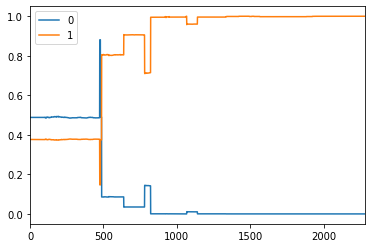

In [17]:
#개별적으로 쓰기위해 저장
for game in predict.keys():
    pd.DataFrame(predict[game]).plot()
    break

In [18]:
import pickle
#변화율 데이터 저장
with open('/home/ubuntu/gangmin/tsvt/multimodal/data/video_win_loss_features.pickle','wb') as f:
    pickle.dump(predict,f)

In [15]:
highlight_re = {}
highlight_delta = {}
for game in data.keys():
    predict_blue = pd.DataFrame(predict[game])
    predict_red = predict_blue[1]
    predict_blue = predict_blue[0]
    
    predict_temp = list(predict_blue)
    predict_temp.insert(0,0)
    predict_temp.pop(-1)
    
    predict_blue = abs(np.array(predict_blue)-np.array(predict_temp))
    predict_blue[0] = predict_blue[1]
    
    predict_temp = list(predict_red)
    predict_temp.insert(0,0)
    predict_temp.pop(-1)
    
    predict_red = abs(np.array(predict_red)-np.array(predict_temp))
    predict_red[0] = predict_red[1]
    
    predict_delta = predict_blue+predict_red
    
    highlight_delta[game] = predict_delta
    
    highlight = []
    for i,v in enumerate(predict_delta):
        if v>0.0085:
            #for j in range(i-12,i+8):
            highlight.append(i)
            
    highlight_re[game] = highlight

In [19]:
import pickle
#변화율 데이터 저장
with open('highlight_delta.pickle','wb') as f:
    pickle.dump(highlight_delta,f)

In [92]:
import pickle
#변화율이 넘어서는 부분 저장
with open('highlight_statistic.pickle',"wb") as f:
    pickle.dump(highlight_re,f)

In [93]:
for game in data.keys():
    
    highlight= []
    
    for i in highlight_re[game]:
        #default -14,10
        for j in range(i-13,i+10):
            highlight.append(j)
    
    
    result[game] = highlight + highlight_add[game]

# frame

In [94]:
result

{'102844212430075086': [462,
  463,
  464,
  465,
  466,
  467,
  468,
  469,
  470,
  471,
  472,
  473,
  474,
  475,
  476,
  477,
  478,
  479,
  480,
  481,
  482,
  483,
  484,
  467,
  468,
  469,
  470,
  471,
  472,
  473,
  474,
  475,
  476,
  477,
  478,
  479,
  480,
  481,
  482,
  483,
  484,
  485,
  486,
  487,
  488,
  489,
  475,
  476,
  477,
  478,
  479,
  480,
  481,
  482,
  483,
  484,
  485,
  486,
  487,
  488,
  489,
  490,
  491,
  492,
  493,
  494,
  495,
  496,
  497,
  626,
  627,
  628,
  629,
  630,
  631,
  632,
  633,
  634,
  635,
  636,
  637,
  638,
  639,
  640,
  641,
  642,
  643,
  644,
  645,
  646,
  647,
  648,
  768,
  769,
  770,
  771,
  772,
  773,
  774,
  775,
  776,
  777,
  778,
  779,
  780,
  781,
  782,
  783,
  784,
  785,
  786,
  787,
  788,
  789,
  790,
  809,
  810,
  811,
  812,
  813,
  814,
  815,
  816,
  817,
  818,
  819,
  820,
  821,
  822,
  823,
  824,
  825,
  826,
  827,
  828,
  829,
  830,
  831,
  1055,
  10

In [95]:
data

{'102844212430075086':           gold  tower      kill
 0     0.500000   0.50  0.500000
 1     0.500000   0.50  0.500000
 2     0.500000   0.50  0.500000
 3     0.500000   0.50  0.500000
 4     0.500000   0.50  0.500000
 ...        ...    ...       ...
 2278  0.474088   0.25  0.346154
 2279  0.474088   0.25  0.346154
 2280  0.474221   0.25  0.346154
 2281  0.474229   0.25  0.346154
 2282  0.474233   0.25  0.346154
 
 [2283 rows x 3 columns],
 '102844212430271695':           gold     tower      kill
 0     0.500000  0.500000  0.500000
 1     0.500000  0.500000  0.500000
 2     0.500000  0.500000  0.500000
 3     0.500000  0.500000  0.500000
 4     0.500000  0.500000  0.500000
 ...        ...       ...       ...
 2023  0.421265  0.153846  0.258065
 2024  0.421078  0.153846  0.258065
 2025  0.421078  0.153846  0.258065
 2026  0.421100  0.153846  0.258065
 2027  0.421116  0.153846  0.258065
 
 [2028 rows x 3 columns],
 '102844212429092040':           gold     tower      kill
 0     0.50000

In [96]:
frames = {}

In [97]:
for game in result.keys():
    temp =np.zeros(len(data[game]))
    for i,v in enumerate(temp):
        if i in result[game]:
            temp[i] = 1
    frames[game] = temp

In [98]:
frames

{'102844212430075086': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212430271695': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212429092040': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212430402768': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212430599377': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212429747404': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844224148503678': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212428895431': array([0., 0., 0., ..., 1., 1., 1.]),
 '102844224148896895': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212430730450': array([0., 0., 0., ..., 1., 1., 1.]),
 '102844224146472059': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212429419722': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212429288649': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212431779031': array([0., 0., 0., ..., 0., 0., 0.]),
 '102844212431058132': array([0., 0., 0., ..., 1., 1., 1.]),
 '102844212430927059': array([0., 0., 0., ..., 1., 1., 1.]),
 '102844212429550795': a

In [99]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/exp_data/highlight_frames.pickle',"wb") as f:
    pickle.dump(frames,f)